In [1]:
######### libraries ################
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def scale_plot_size(factor=3.0):
    default_figsize = mpl.rcParamsDefault['figure.figsize']
    mpl.rcParams['figure.figsize'] = [val*factor for val in default_figsize]
scale_plot_size(1.5)

def rms(df):
    return np.sqrt(df.dot(df)/df.size)


In [3]:
######### reading file ##########
header = ["Hr", "Min","Sec","uSec", "X","Y"]

training_set_path = os.path.expanduser('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing3_1')

dirList = os.listdir(os.path.expanduser(training_set_path))
dirList.sort()
n = 0

for sets in dirList: 
    if sets == 'temp_00001.csv':
        break
    df = pd.read_csv(training_set_path+"/"+sets, header=None)
    df.columns = header
    data = np.array(df,np.float64)
    columnx = data[:,4]
    columny = data[:,5]

    if n==0 :
        x = columnx
        y = columny

        kurtx = stats.kurtosis(columnx)
        kurty = stats.kurtosis(columny)

        rmsx = rms(columnx)
        rmsy = rms(columny)
        
        n = 1
    else:
        x= np.append(x,columnx)
        y= np.append(y,columny)

        kurtx = np.append(kurtx,stats.kurtosis(columnx))
        kurty = np.append(kurty,stats.kurtosis(columny))

        rmsx = np.append(rmsx,rms(columnx))
        rmsy = np.append(rmsy,rms(columny))


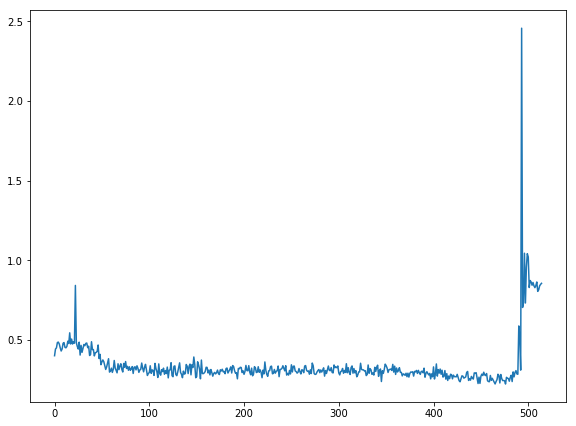

In [4]:
# plt.plot(kurtx)
plt.plot(rmsx)

In [5]:
X1 = np.vstack ((kurtx,kurty,rmsx,rmsy))
threshold = int(kurtx.shape[0]*0.25)
output = np.arange (kurtx.shape[0]-1,-1,-1,dtype=np.float64)
output = np.reshape(output,(kurtx.shape[0],1))
Y1 = np.where( output>threshold , 0 , 1 )
Xnm1 = preprocessing.normalize(X1)
Xnm1 = Xnm1.transpose()
# X_train, X_test, Y_train, Y_test = train_test_split(Xnm, Y, test_size=0.2, random_state=69)
# X_train, X_test, Y_train, Y_test = train_test_split(Xnm, Y, test_size=0.5)

In [6]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Xnm1,Y1)
# print(Y1.shape)
# print(Xnm1.shape)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
header = ["Hr", "Min","Sec","uSec", "X","Y"]

training_set_path = os.path.expanduser('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing2_1')

dirList = os.listdir(os.path.expanduser(training_set_path))
dirList.sort()
n = 0

for sets in dirList: 
    if sets == 'temp_00001.csv':
        break
    df = pd.read_csv(training_set_path+"/"+sets, header=None)
    df.columns = header
    data = np.array(df,np.float64)
    columnx = data[:,4]
    columny = data[:,5]

    if n==0 :
        x = columnx
        y = columny

        kurtx = stats.kurtosis(columnx)
        kurty = stats.kurtosis(columny)

        rmsx = rms(columnx)
        rmsy = rms(columny)
        
        n = 1
    else:
        x= np.append(x,columnx)
        y= np.append(y,columny)

        kurtx = np.append(kurtx,stats.kurtosis(columnx))
        kurty = np.append(kurty,stats.kurtosis(columny))

        rmsx = np.append(rmsx,rms(columnx))
        rmsy = np.append(rmsy,rms(columny))


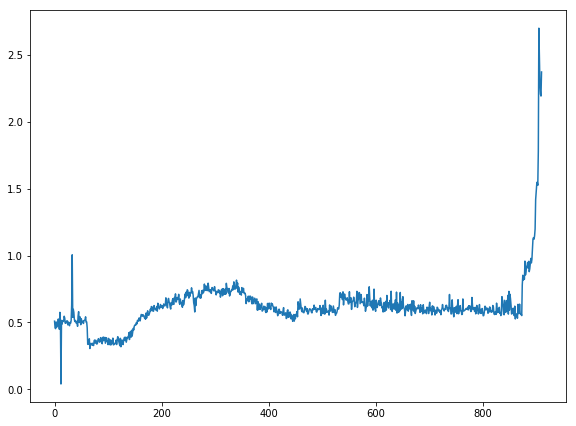

In [8]:
plt.plot(rmsx)

In [9]:
X2 = np.vstack ((kurtx,kurty,rmsx,rmsy))
threshold = int(kurtx.shape[0]*0.25)
output = np.arange (kurtx.shape[0]-1,-1,-1,dtype=np.float64)
output = np.reshape(output,(kurtx.shape[0],1))
Y2 = np.where( output>threshold , 0 , 1 )
Xnm2 = preprocessing.normalize(X2)
Xnm2 = Xnm2.transpose()

In [10]:
pred = clf.predict(Xnm2)
accuracy_score(Y2,pred)
# print(pred.shape)
# print(Xnm2.shape) 

0.53128430296377605

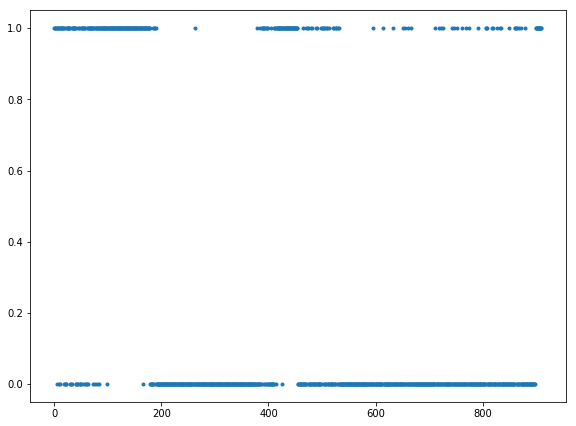

In [11]:
plt.plot(pred,'.')